Attention Output:
 [[0.5915408  0.60579382 0.33621558 0.46694364 0.37945368 0.3507109
  0.62158307 0.46631711]
 [0.60578392 0.61362206 0.34399352 0.49988475 0.41270422 0.33950922
  0.61709207 0.46146097]
 [0.59813246 0.60243984 0.34043979 0.48088549 0.38642857 0.34216621
  0.61658134 0.45919637]
 [0.60095128 0.6088333  0.34978059 0.49770483 0.40404783 0.33363278
  0.6239359  0.45669352]
 [0.60963626 0.61199962 0.33801838 0.46826092 0.38188417 0.34906456
  0.62136878 0.47491867]
 [0.6171866  0.60713314 0.34999862 0.50882272 0.41250449 0.33510178
  0.61640786 0.45705377]]
Attention Weights:
 [[0.22030096 0.11798282 0.15003067 0.17264606 0.16698632 0.17205317]
 [0.19958487 0.12272494 0.15590538 0.17115577 0.14647715 0.20415189]
 [0.20675001 0.13396092 0.14654315 0.17061649 0.16219563 0.17993379]
 [0.18593439 0.13395022 0.15485604 0.17029209 0.16301062 0.19195663]
 [0.21581464 0.12279616 0.15646804 0.18882849 0.14954797 0.16654469]
 [0.20703444 0.13219894 0.18334405 0.15136199 0.14231809 0

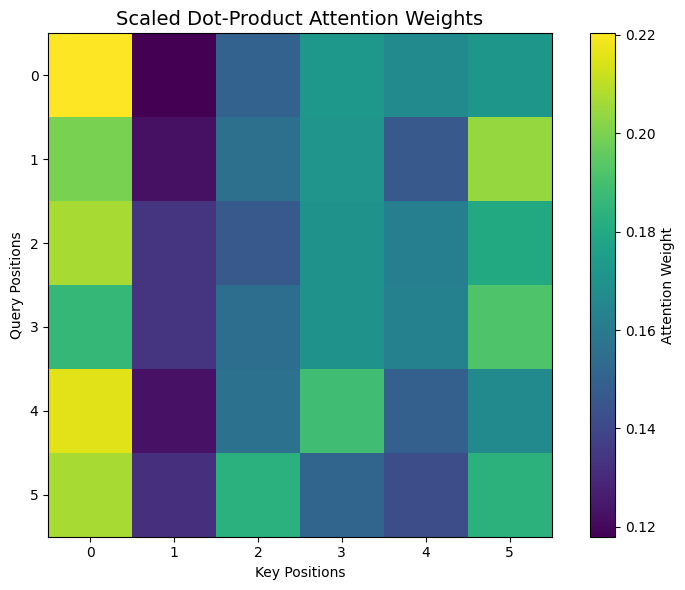

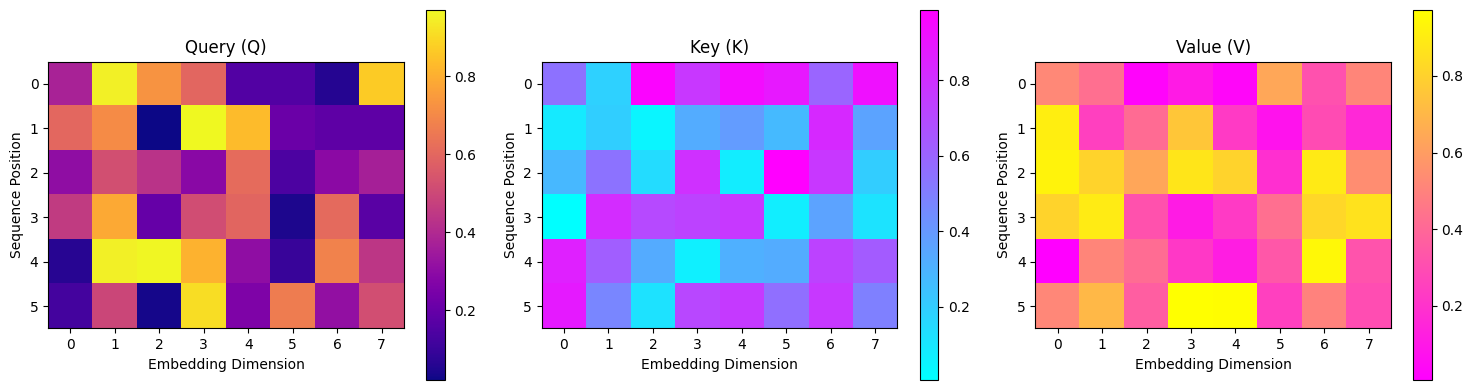

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return output, attention_weights

# Example Inputs
np.random.seed(42)

seq_len = 6
d_model = 8

Q = np.random.rand(seq_len, d_model)
K = np.random.rand(seq_len, d_model)
V = np.random.rand(seq_len, d_model)

output, attention_weights = scaled_dot_product_attention(Q, K, V)

print("Attention Output:\n", output)
print("Attention Weights:\n", attention_weights)

# Visualization 1: Attention Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights, cmap="viridis")
plt.colorbar(label="Attention Weight")
plt.title("Scaled Dot-Product Attention Weights", fontsize=14)
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.xticks(range(seq_len))
plt.yticks(range(seq_len))
plt.grid(False)
plt.tight_layout()
plt.show()

# Visualization 2: Q, K, V Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

im0 = axes[0].imshow(Q, cmap="plasma")
axes[0].set_title("Query (Q)")
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(K, cmap="cool")
axes[1].set_title("Key (K)")
plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(V, cmap="spring")
axes[2].set_title("Value (V)")
plt.colorbar(im2, ax=axes[2])

for ax in axes:
    ax.set_xlabel("Embedding Dimension")
    ax.set_ylabel("Sequence Position")

plt.tight_layout()
plt.show()